In [1]:
import pandas as pd
import os

In [2]:
task_file = '/home/lwang/models/HDX_LSTM/data/Latest_set/merged_data-NAcomplex.xlsx'
hdx_dir = '/home/lwang/models/HDX_LSTM/data/Latest_set/HDX_files'

df = pd.read_excel(task_file)
df = df.dropna(subset=['structure_file'])
print(df.shape)
df = df.dropna(subset=['database_id']).drop_duplicates(subset=['database_id'])
print(df.shape, df.columns)

(215, 24)
(49, 24) Index(['database_id', 'database', 'literature', 'protein', 'state',
       'match_uni', 'complex_uni', 'uni_sequence', 'modification', 'mutation',
       'truncation', 'complex_state', 'D_Conc', 'pH', 'temp', 'data_type',
       'check', 'structure_file', 'note', 'chain_identifier',
       'correction_value', 'protein_chain', 'NA_chain', 'SM_chain'],
      dtype='object')


In [3]:
total_df = pd.DataFrame()
for id in df['database_id']:
    fpath = os.path.join(hdx_dir, f'{id}_revised.xlsx')
    if not os.path.exists(fpath):
        continue
    hdx_df = pd.read_excel(fpath)
    #hdx_df = hdx_df.drop_duplicates(subset=['sequence'])

    total_df = pd.concat([total_df, hdx_df], axis=0)

print(total_df.shape)
total_df = total_df.dropna(subset=['log_t'])
print(total_df.shape)
#trim_df = total_df.drop_duplicates(subset=['sequence'])
#print(trim_df.shape)


(134858, 19)
(133988, 19)


In [4]:
from sklearn.cluster import KMeans

# Extract the 'log_t' column from total_df
log_t_values = total_df['log_t'].values.reshape(-1, 1)

# Define the number of clusters
n_clusters = 3

# Perform K-means clustering
kmeans = KMeans(n_clusters=n_clusters, random_state=0)
clusters = kmeans.fit_predict(log_t_values)

# Add the cluster labels to total_df
total_df['cluster'] = clusters

# Calculate the range for each cluster
cluster_ranges = total_df.groupby('cluster')['log_t'].agg(['min', 'max'])

# Print the range for each cluster
for cluster, range_values in cluster_ranges.iterrows():
    print(f"Cluster {cluster}: Range ({range_values['min']}, {range_values['max']})")

Cluster 0: Range (1.477121254719662, 2.819543935541869)
Cluster 1: Range (2.954242538392289, 4.857332496431268)
Cluster 2: Range (-1.221848749616356, 1.301029995663981)


(27211, 20) (66879, 20) (39898, 20)
7478 9361 7904
26.804973528470676 38.568889760449835 50.841081069167956


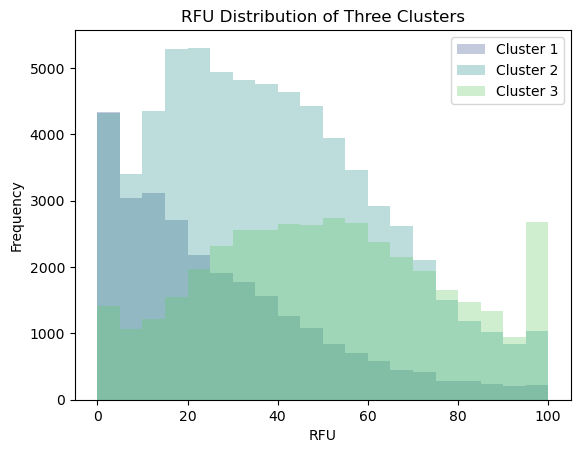

In [5]:
import seaborn as sns
import numpy as np

cluster2 = total_df[total_df['cluster'] == 0]
cluster3 = total_df[total_df['cluster'] == 1]
cluster1 = total_df[total_df['cluster'] == 2]

print(cluster1.shape, cluster2.shape, cluster3.shape)
print(len(cluster1['sequence'].unique()),
     len(cluster2['sequence'].unique()),
     len(cluster3['sequence'].unique()))
print(cluster1['RFU'].mean(), cluster2['RFU'].mean(), cluster3['RFU'].mean())

import matplotlib.pyplot as plt

# Extract the 'RFU' values for each cluster
cluster1_rfu = cluster1['RFU']
cluster2_rfu = cluster2['RFU']
cluster3_rfu = cluster3['RFU']

palette = sns.color_palette("viridis", 3)

# Plot the histogram
plt.figure()
'''sns.kdeplot(cluster1_rfu, bw_adjust=0.5, color=palette[0], label='Cluster 1')
sns.kdeplot(cluster2_rfu, bw_adjust=0.5, color=palette[1], label='Cluster 2')
sns.kdeplot(cluster3_rfu, bw_adjust=0.5, color=palette[2], label='Cluster 3')'''
plt.hist(cluster1_rfu, bins=20, alpha=0.3, color=palette[0], label='Cluster 1')
plt.hist(cluster2_rfu, bins=20, alpha=0.3, color=palette[1], label='Cluster 2')
plt.hist(cluster3_rfu, bins=20, alpha=0.3, color=palette[2], label='Cluster 3')
# Add labels and title
plt.xlabel('RFU')
plt.ylabel('Frequency')
plt.title('RFU Distribution of Three Clusters')

# Add legend
plt.legend()

# Show the plot
plt.show()
#plt.savefig('/home/lwang/models/HDX_LSTM/data/Latest_set/RFU_distribution_hist.png', dpi = 300)

In [6]:
print(cluster3['database_id'].unique())
print(cluster2['database_id'].unique())
print(cluster1['database_id'].unique())

['JACS_ADA' 'MSV000089247' 'PXD010586' 'PXD011914' nan 'PXD013841'
 'PXD015778' 'PXD017156' 'PXD018028' 'PXD019047' 'PXD019199' 'PXD019367'
 'PXD019530' 'PXD019884' 'PXD020890' 'PXD021132' 'PXD021743' 'PXD025300'
 'PXD025717' 'PXD026458' 'PXD033139' 'PXD033528' 'PXD034028' 'PXD034904'
 'PXD035397' 'PXD035628' 'PXD035741' 'PXD036446' 'PXD037571' 'PXD039682'
 'PXD040460' 'PXD041067' 'PXD041359' 'PXD042971' 'PXD045520']
['JACS_ADA' 'MSV000090815' 'PXD010586' 'PXD011914' nan 'PXD013841'
 'PXD015778' 'PXD018028' 'PXD018172' 'PXD019047' 'PXD019199' 'PXD019202'
 'PXD019367' 'PXD019810' 'PXD019884' 'PXD020890' 'PXD021132' 'PXD021743'
 'PXD023434' 'PXD025300' 'PXD025717' 'PXD026458' 'PXD032837' 'PXD032929'
 'PXD033139' 'PXD033528' 'PXD034028' 'PXD034904' 'PXD035397' 'PXD035628'
 'PXD036446' 'PXD037571' 'PXD039682' 'PXD040227' 'PXD040460' 'PXD041067'
 'PXD041359' 'PXD042971' 'PXD045520']
['JACS_ADA' 'MSV000086658' 'MSV000088425' 'MSV000088648' 'MSV000089247'
 'MSV000090611' 'MSV000090815' 'PXD01

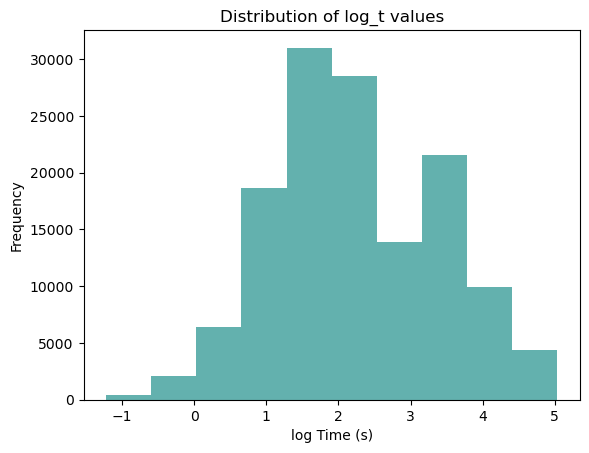

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

palette = sns.color_palette("viridis", 3)
total_df['log_t'].hist(bins=10, color=palette[1], alpha=0.7)
plt.grid(False)
#sns.kdeplot(total_df['log_t'], bw_adjust=0.5, color=palette[0])
plt.xlabel('log Time (s)')
plt.ylabel('Frequency')
#plt.axvline(x=1.35, color='red', linestyle='--')
#plt.axvline(x=2.85, color='red', linestyle='--')
plt.title('Distribution of log_t values')
#plt.show()
plt.savefig('/home/lwang/models/HDX_LSTM/data/Latest_set/log_t_distribution_hist.png', dpi = 300)


In [ ]:
import torch
import os
from torchdrug import data
from sklearn.model_selection import train_test_split

graph_dir = '/home/lwang/models/HDX_LSTM/data/Latest_set/graph_ensemble_GVP'
graph_files = os.listdir(graph_dir)

cluster_id = 2

if not os.path.exists(f'{graph_dir}/cluster{cluster_id}'):
    os.mkdir(f'{graph_dir}/cluster{cluster_id}')

count = 0
for graph_file in graph_files:
    if not graph_file.endswith('.pt'):
        continue

    data_ensemble = torch.load(os.path.join(graph_dir, graph_file))

    whole_set = data.Protein.pack(data_ensemble)
    mask = (whole_set.y[:, cluster_id] != -1)
    filtered_set = whole_set[mask]

    filtered_set.y = filtered_set.y[:, 1].reshape(-1)

    if not len(filtered_set) == 0:
        count += len(filtered_set)
        print(f'{graph_file} has {len(filtered_set)} graphs')
        torch.save(filtered_set, f'{graph_dir}/cluster{cluster_id}/{graph_file}.pt')

print(f'Total number of graphs: {count}')

In [1]:
import os
import torch
import pandas as pd
from tqdm import tqdm
from torchdrug import data
from sklearn.model_selection import train_test_split

##################################### initial setting ##################################### 
cluster = 'cluster1_8A_manual_rescale'
data_folder = 'graph_ensemble_simpleGearNet'
root_dir = "/home/lwang/models/HDX_LSTM/data/Latest_set"

summary_HDX_file = f'{root_dir}/merged_data-NAcomplex.xlsx'
hdx_df = pd.read_excel(summary_HDX_file, sheet_name='Sheet1')
hdx_df = hdx_df.dropna(subset=['structure_file'])
pepGraph_dir = os.path.join(root_dir, data_folder, cluster)

apo_input = []
complex_input = []
hdx_df = hdx_df.drop_duplicates(subset=['structure_file'])

print('data loading')
for row_id, row in tqdm(hdx_df.iterrows()):
    pdb = row['structure_file'].strip().split('.')[0].upper()
    pepGraph_file = f'{pepGraph_dir}/{pdb}.pt'
    if os.path.isfile(pepGraph_file):
        pepGraph_ensemble = torch.load(pepGraph_file)
        if row['complex_state'] == 'single':
            apo_input.append(pepGraph_ensemble)
        else:
            complex_input.append(pepGraph_ensemble)
    else:
        continue

print('length of apo data:', len(apo_input))
print('length of complex data:', len(complex_input))

train_val_apo = data.Protein.pack(apo_input)
train_val_complex = data.Protein.pack(complex_input)
train_val_apo.view = 'residue'
train_val_complex.view = 'residue'

# when datatype is torch_geometric.data.Data
'''train_val_apo, test_apo = train_test_split(apo_input, test_size=0.1, random_state=42)
train_val_complex, test_complex = train_test_split(complex_input, test_size=0.1, random_state=42)

print('length of test_apo:', len(test_apo))
print('length of test_complex:', len(test_complex))'''

torch.save(train_val_apo, f'{root_dir}/{data_folder}/train_val_apo.pt')
torch.save(train_val_complex, f'{root_dir}/{data_folder}/train_val_complex.pt')

data loading


154it [00:37,  4.06it/s]


length of apo data: 75
length of complex data: 39


AttributeError: 'list' object has no attribute 'meta_dict'

In [10]:
### trim the redundancy based on cosine similarity

from torch.nn import functional as F
import numpy as np

dataset = apo_input + complex_input

max_nodes = 0
num_graphs = len(dataset)
feat_dim = dataset[0].residue_feature.shape[1]
for graph in dataset:
    max_nodes = max(max_nodes, graph.num_node)
print('number of graphs:', num_graphs)
print('max number of nodes:', max_nodes)
print('feature dimension:', feat_dim)

count = 0
embed_matrix = np.zeros((num_graphs, max_nodes, feat_dim), dtype=np.float32)
HDX_matrix = np.zeros((num_graphs, 1), dtype=np.float32)
for index, graph in enumerate(dataset):
    if graph.residue_feature.shape[1] != feat_dim:
        continue
    mat = F.pad(graph.residue_feature.float(), (0, 0,0, max_nodes - graph.residue_feature.float().shape[0]), 'constant', 0)
    embed_matrix[count] = mat
    HDX_matrix[count] = graph.y
    count += 1
embed_matrix = np.nan_to_num(embed_matrix)

number of graphs: 14563
max number of nodes: tensor(132)
feature dimension: 98


In [11]:
from scipy.spatial.distance import cdist

def cosine_similarity_matrix(embed_matrix):
    # Normalize the embeddings to unit vectors
    norms = np.linalg.norm(embed_matrix, axis=1, keepdims=True)
    normalized_embeddings = embed_matrix / norms
    
    similarity_matrix = np.dot(normalized_embeddings, normalized_embeddings.T)
    similarity_matrix = np.clip(similarity_matrix, -1, 1)
    return similarity_matrix

embed_matrix = np.reshape(embed_matrix, (embed_matrix.shape[0], -1))
similarity_matrix = cosine_similarity_matrix(embed_matrix)
similarity_matrix = np.nan_to_num(similarity_matrix)  # Optionally handle NaNs if still necessary

# Compute the mean similarity score excluding self-similarity
np.fill_diagonal(similarity_matrix, np.nan)  # Ignore self-similarity by setting diagonal to NaN
similarity_score = np.nanmean(similarity_matrix, axis=1)

(13316, 13316) (88664586,)


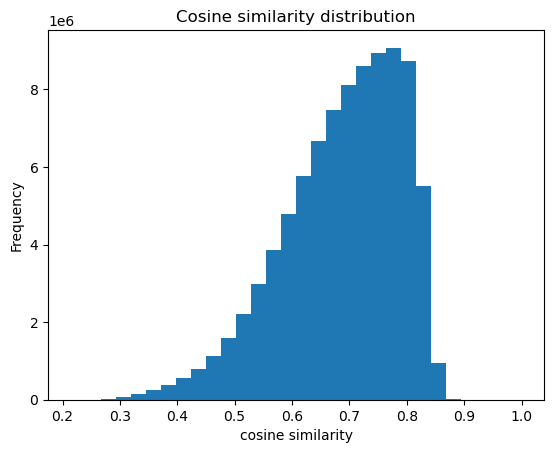

In [4]:
### distribution of similarity scores
from scipy.stats import spearmanr
%matplotlib inline
import matplotlib.pyplot as plt

lower_index = np.tril_indices_from(similarity_matrix)
lower_triangle_values = similarity_matrix[lower_index]
print(similarity_matrix.shape, lower_triangle_values.shape)
temp_similarity = lower_triangle_values.flatten()

plt.hist(temp_similarity, bins=30)
plt.xlabel('cosine similarity')
plt.ylabel('Frequency')
plt.title('Cosine similarity distribution')
plt.show()


In [18]:
##  find the maximum independent set by greedy algorithm

def trim_database(similarity_matrix, cutoff):
    n = similarity_matrix.shape[0]
    keep = np.array([True] * n)
    degrees = np.sum(similarity_matrix > cutoff, axis=0)  # Calculate the degree based on cutoff

    while np.any(degrees > 0):
        # Find the node with the maximum degree
        max_node = np.argmax(degrees)
        keep[max_node] = False  # Remove this node
        
        # Update degrees: set the degree of this node to 0 and decrement the degrees of its neighbors
        affected_nodes = similarity_matrix[max_node, :] > cutoff
        degrees[affected_nodes] -= 1
        degrees[max_node] = 0

    # The indices of the items to keep
    indices_to_keep = np.where(keep)[0]
    return indices_to_keep

cutoff = 0.9

# Get the indices to keep
indices_to_keep = trim_database(similarity_matrix, cutoff)
print("Indices to keep:",len(indices_to_keep))


Indices to keep: 7681


(7681, 7681)
(7681, 7681) (29502721,)


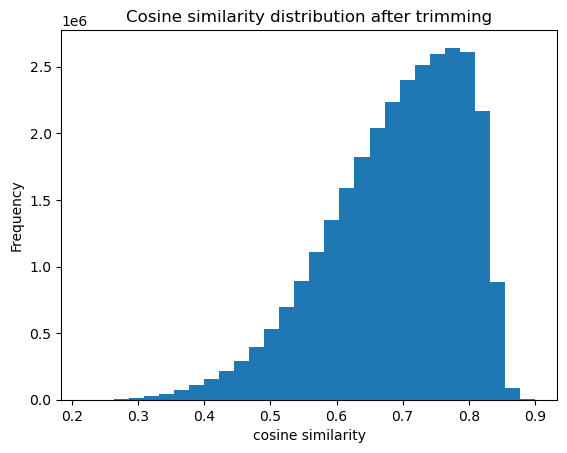

In [19]:
#plot the similarity distribution after trimming
temp_matrix = similarity_matrix[indices_to_keep, :]
temp_matrix = temp_matrix[:, indices_to_keep]
print(temp_matrix.shape)

lower_index = np.tril_indices_from(temp_matrix)
lower_triangle_values = temp_matrix[lower_index]
print(temp_matrix.shape, lower_triangle_values.shape)

plt.hist(lower_triangle_values, bins=30)
plt.xlabel('cosine similarity')
plt.ylabel('Frequency')
plt.title('Cosine similarity distribution after trimming')
plt.show()


In [35]:
# load graph input residue_features for t-SNE analysis
# [N, 56] matrix -> [1, 56] vector
# M graphs -> [M, 56] matrix -> [M, 2] matrix via t-SNE
import torch
import os
import pandas as pd
from tqdm import tqdm
import numpy as np

cluster = 'cluster1_8A_manual_rescale'
data_folder = 'graph_ensemble_simpleGearNet'
root_dir = "/home/lwang/models/HDX_LSTM/data/Latest_set"

summary_HDX_file = f'{root_dir}/merged_data-NAcomplex.xlsx'
hdx_df = pd.read_excel(summary_HDX_file, sheet_name='Sheet1')
hdx_df = hdx_df.dropna(subset=['structure_file'])
pepGraph_dir = os.path.join(root_dir, data_folder, cluster)
hdx_df = hdx_df.drop_duplicates(subset=['structure_file'])

print('data loading')
training_set = []
for row_id, row in tqdm(hdx_df.iterrows()):
    pdb = row['structure_file'].strip().split('.')[0].upper()
    pepGraph_file = f'{pepGraph_dir}/{pdb}.pt'
    if os.path.isfile(pepGraph_file):
        pepGraph_ensemble = torch.load(pepGraph_file)
        training_set.extend(pepGraph_ensemble)

print('training_set vectors length:', len(training_set))

cluster = 'cluster1_8A_manual_rescale'
data_folder = '/home/lwang/models/HDX_LSTM/data/Latest_test/graph_ensemble_simpleGearNet'
root_dir = "/home/lwang/models/HDX_LSTM/data/Latest_test"

test_set = []
for file in os.listdir(os.path.join(root_dir, data_folder, cluster)):
    test_set.extend(pepGraph_ensemble)

print('test set vectors length:', len(test_set))

data loading


154it [00:18,  8.25it/s]

training_set vectors length: 11647
test set vectors length: 792


In [36]:
import numpy as np
import torch.nn.functional as F
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

dataset = list(test_set) + list(training_set)

max_nodes = 0
num_graphs = len(dataset)
feat_dim = dataset[0].residue_feature.shape[1]

for graph in dataset:
    max_nodes = max(max_nodes, graph.num_node)
print('number of graphs:', num_graphs)
print('max number of nodes:', max_nodes)
print('feature dimension:', feat_dim)

count = 0
embed_matrix = np.zeros((num_graphs, max_nodes, feat_dim), dtype=np.float32)
HDX_list= np.zeros((num_graphs, 1), dtype=np.float32)

for index, graph in enumerate(dataset):
    if graph.residue_feature.shape[1] != feat_dim:
        continue
    mat = F.pad(graph.residue_feature.float(), (0, 0,0, max_nodes - graph.residue_feature.float().shape[0]), 'constant', 0)
    embed_matrix[count] = mat
    HDX_list[count] = graph.y
    count += 1
embed_matrix = np.nan_to_num(embed_matrix)

number of graphs: 12439
max number of nodes: tensor(96)
feature dimension: 56


n_neighbors=30, min_dist=0.3


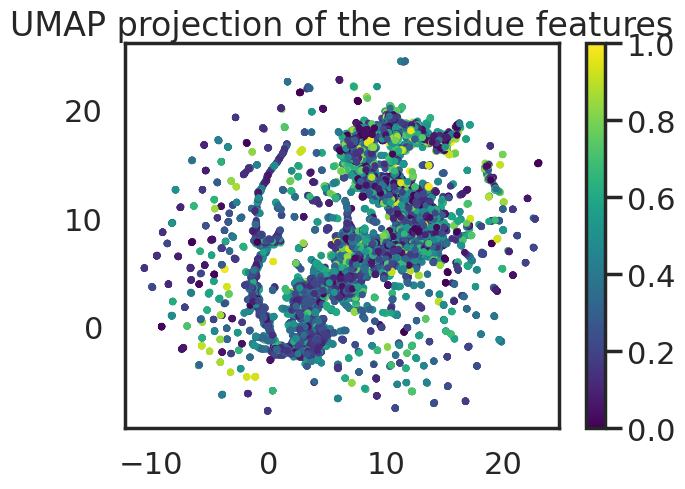

n_neighbors=30, min_dist=0.5


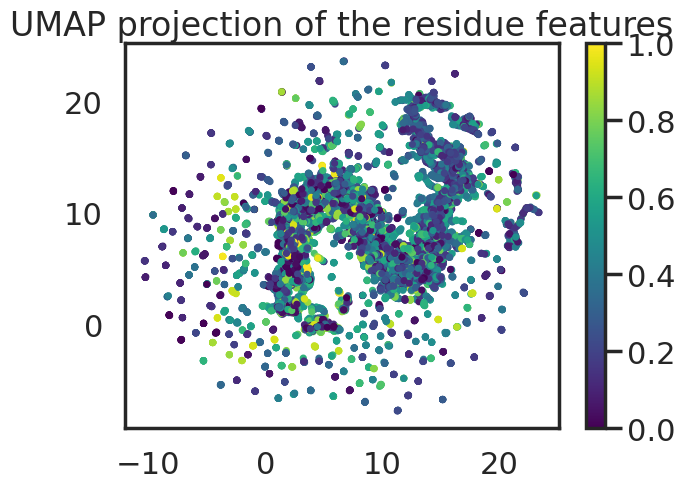

n_neighbors=30, min_dist=0.8


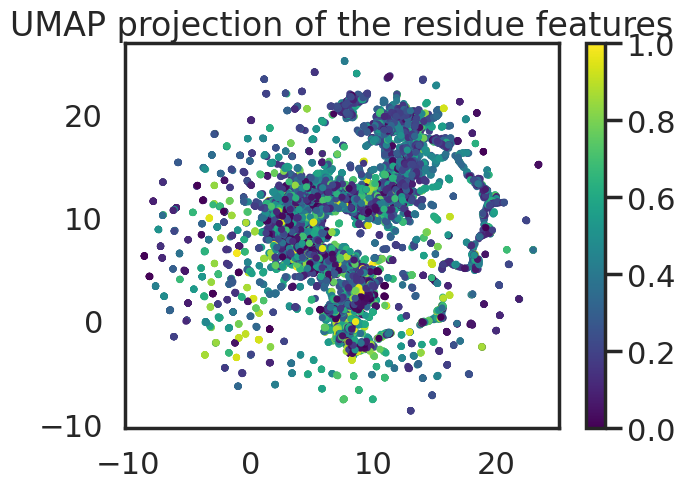

n_neighbors=40, min_dist=0.3


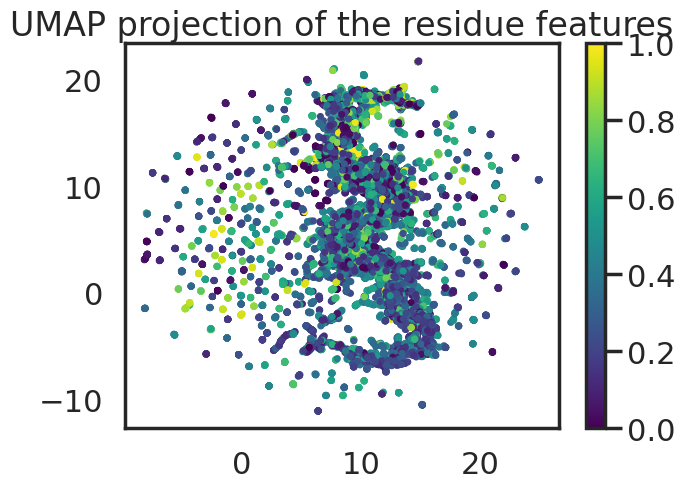

n_neighbors=40, min_dist=0.5


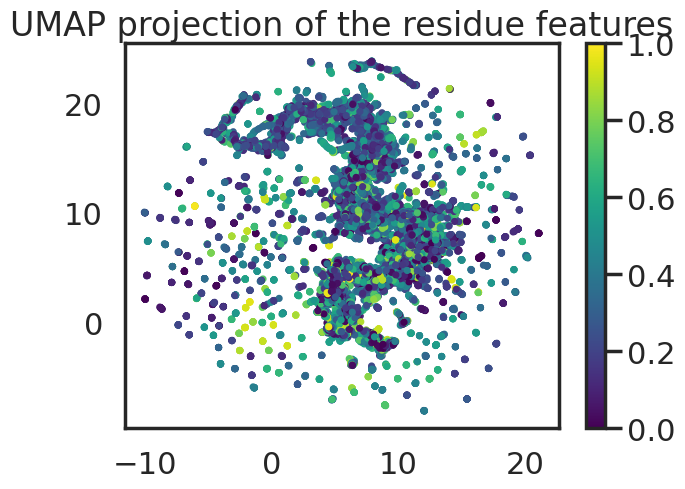

n_neighbors=40, min_dist=0.8


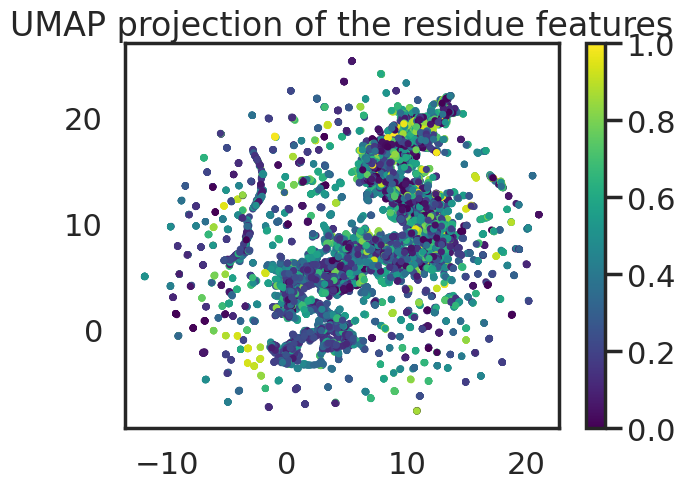

In [34]:
import umap
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

sns.set(style='white', context='poster', rc={'figure.figsize':(7,5)})
## use the mean residue feature for each graph
'''mean_embed = np.zeros((len(dataset), 56), dtype=np.float32)
HDX_list = []
for index, graph in enumerate(dataset):
    mtx = torch.mean(graph.residue_feature, dim=0)
    HDX_list.extend(graph.y.detach().numpy())
    mean_embed[index] = mtx
print(mean_embed.shape)'''

## use the flatten residue feature for each graph
count = 0
raw_matrix = np.zeros((num_graphs, max_nodes, feat_dim), dtype=np.float32)
HDX_list= np.zeros((num_graphs, 1), dtype=np.float32)
for index, graph in enumerate(dataset):
    if graph.residue_feature.shape[1] != feat_dim:
        continue
    mat = F.pad(graph.residue_feature.float(), (0, 0,0, max_nodes - graph.residue_feature.float().shape[0]), 'constant', 0)
    raw_matrix[count] = mat
    HDX_list[count] = graph.y
    count += 1
flat_matrix = np.nan_to_num(raw_matrix)
flat_matrix = np.reshape(flat_matrix, (flat_matrix.shape[0], -1))

embed_matrix = flat_matrix
scale_embed_matrix = StandardScaler().fit_transform(embed_matrix)

def plot_umap(embed_matrix, HDX_list, n_neighbors=5, min_dist=0.3, metric='eucledian'):
    reducer = umap.UMAP(n_neighbors=5, min_dist=0.3, metric='cosine')
    umap_embedding = reducer.fit_transform(embed_matrix)
    fig = plt.figure()
    plt.scatter(umap_embedding[:, 0], umap_embedding[:, 1], c=HDX_list, cmap='viridis', s=10)
    plt.colorbar()
    plt.title('UMAP projection of the residue features')
    plt.show()

for n_neighbors in [30, 40]:
    for min_dist in [0.3, 0.5, 0.8]:
        print(f"n_neighbors={n_neighbors}, min_dist={min_dist}")
        plot_umap(scale_embed_matrix, HDX_list, n_neighbors=n_neighbors, min_dist=min_dist)

In [22]:
embed_matrix = np.reshape(embed_matrix, (embed_matrix.shape[0], -1))
tsne = TSNE(n_components=2, perplexity=50.0, n_iter=5000, early_exaggeration=12, learning_rate=368, verbose=1).fit_transform(embed_matrix)

[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 12439 samples in 0.037s...
[t-SNE] Computed neighbors for 12439 samples in 6.092s...
[t-SNE] Computed conditional probabilities for sample 1000 / 12439
[t-SNE] Computed conditional probabilities for sample 2000 / 12439
[t-SNE] Computed conditional probabilities for sample 3000 / 12439
[t-SNE] Computed conditional probabilities for sample 4000 / 12439
[t-SNE] Computed conditional probabilities for sample 5000 / 12439
[t-SNE] Computed conditional probabilities for sample 6000 / 12439
[t-SNE] Computed conditional probabilities for sample 7000 / 12439
[t-SNE] Computed conditional probabilities for sample 8000 / 12439
[t-SNE] Computed conditional probabilities for sample 9000 / 12439
[t-SNE] Computed conditional probabilities for sample 10000 / 12439
[t-SNE] Computed conditional probabilities for sample 11000 / 12439
[t-SNE] Computed conditional probabilities for sample 12000 / 12439
[t-SNE] Computed conditional probabilities for sa

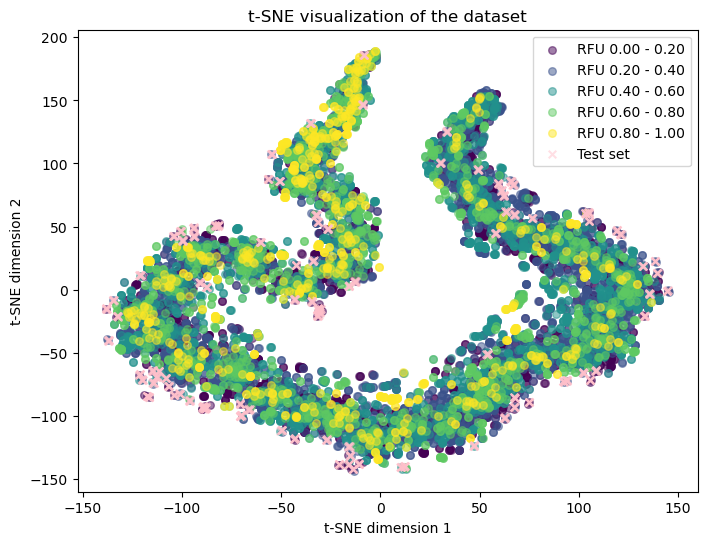

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.cm import viridis
%matplotlib inline
# Assuming HDX_list is a numpy array; flatten it if needed
HDX_list = HDX_list.ravel()  # More memory efficient than flatten()

num_bins = 5
bins = np.linspace(0, 1, num_bins + 1)

# Assign each HDX value to a bin
bin_indices = np.digitize(HDX_list, bins) - 1  # Adjust indices to be 0-based

# Prepare the plot
plt.figure(figsize=(8, 6))
colors = viridis(np.linspace(0, 1, num_bins))  # Use viridis colormap for scientific visualization

test_set_length = len(test_set)  # Calculate the length of the test set
marker_size = 30  # Smaller marker size
test_set_marker = 's'  # Square marker for test set
default_marker = 'o'  # Circle marker for the rest

# Iterate over the bins and plot each cluster
for i in range(num_bins):
    indices = np.where(bin_indices == i)[0]
    bin_range = f"{bins[i]:.2f} - {bins[i+1]:.2f}"
    # Plot elements that are in the test set with a different marker
    test_indices = np.intersect1d(indices, np.arange(test_set_length))
    regular_indices = np.setdiff1d(indices, test_indices)
    
#    plt.scatter(tsne[test_indices, 0], tsne[test_indices, 1], color=colors[i],
#                label=f"Bin {bin_range} (Test)", marker=test_set_marker, s=marker_size, alpha=0.5)
    plt.scatter(tsne[regular_indices, 0], tsne[regular_indices, 1], color=colors[i],
                label=f"RFU {bin_range}", marker=default_marker, s=marker_size, alpha=0.5)
plt.scatter(tsne[np.arange(test_set_length), 0], tsne[np.arange(test_set_length), 1], color='pink',
            label="Test set", marker='x', s=marker_size, alpha=0.5)
plt.xlabel("t-SNE dimension 1")
plt.ylabel("t-SNE dimension 2")
plt.title("t-SNE visualization of the dataset")
plt.legend()
plt.rcParams['savefig.dpi'] = 300
plt.show()
#plt.savefig('/home/lwang/models/HDX_LSTM/data/Latest_set/embedding_t-sne.png')


(24101, 1536)
(24101,) (24101,)


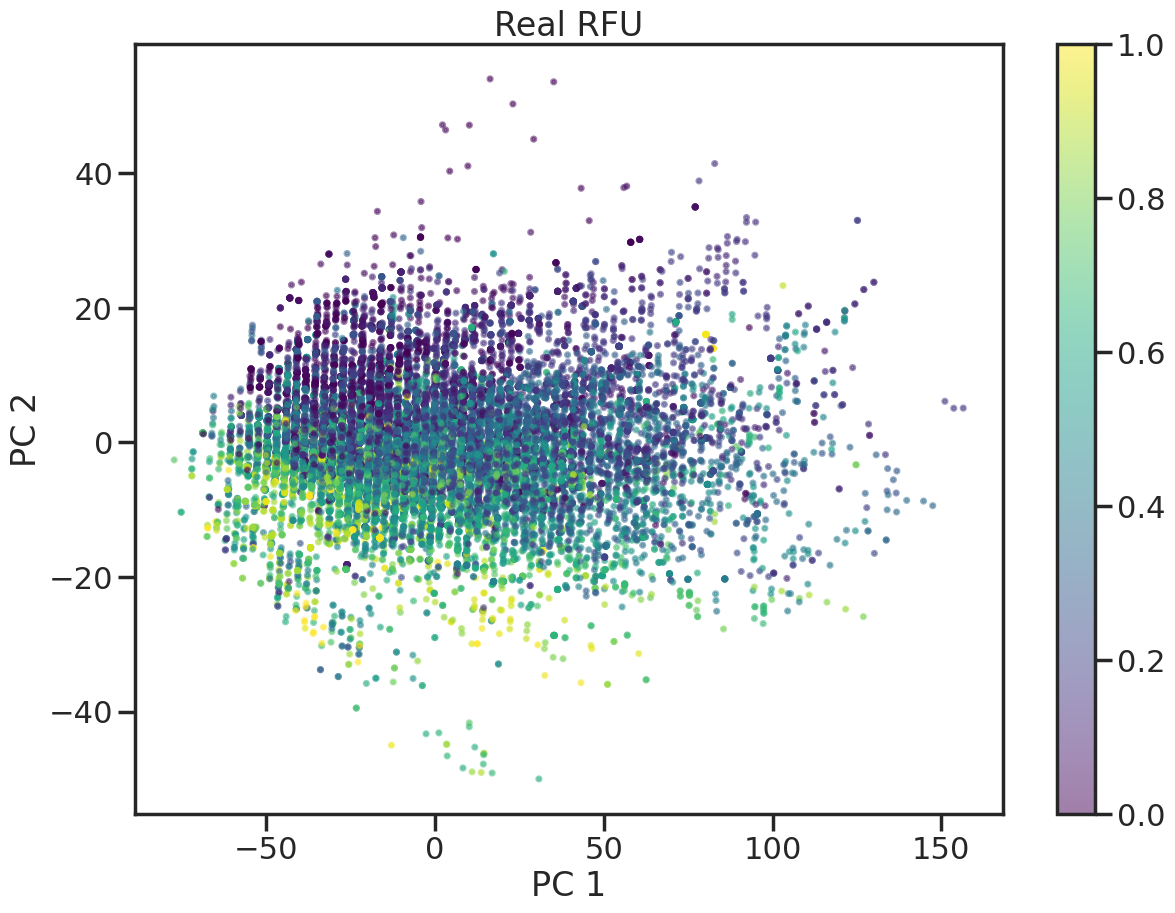

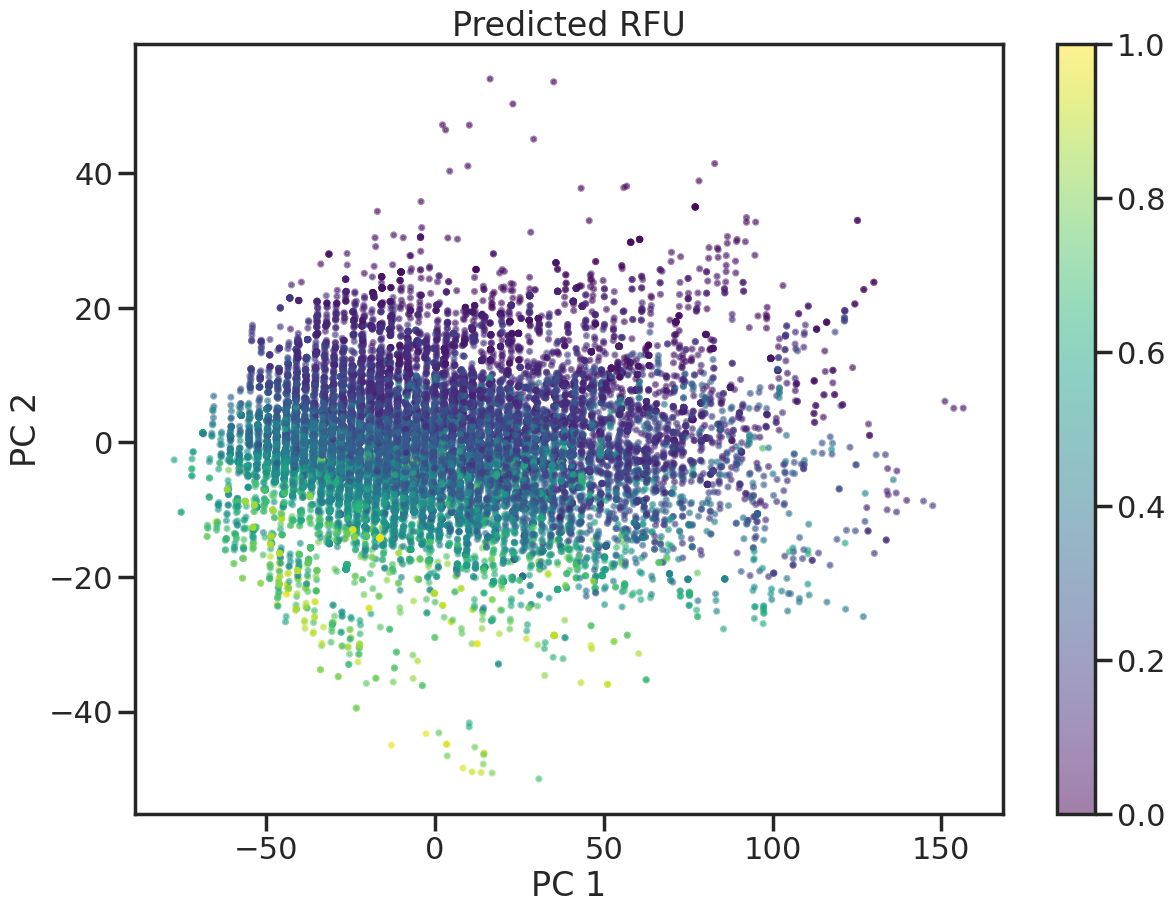

In [62]:
# run PCA analysis on model embeddings

from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

## embedding loading ##
data = np.load('/home/lwang/models/HDX_LSTM/results/240918_GVP/graph_embedding.npy', allow_pickle=True).item()
y_true = data['Y_True']
y_pred = data['Y_Pred']
embed_matrix = data['Graph_Embedding']
print(embed_matrix.shape)
print(y_true.shape, y_pred.shape)

scaler = StandardScaler()
scale_embed = scaler.fit_transform(embed_matrix)

def plot_PCA(embedding, y_list, title=None, save_path=None):
    plt.figure()
    sns.set(style='ticks', context='poster', rc={'figure.figsize':(14,10)})
    pca = PCA(n_components=2)
    pca_result = pca.fit_transform(embedding)
    plt.scatter(pca_result[:, 0], pca_result[:, 1], c=y_list, cmap='viridis', s=10, alpha=0.5)
    plt.colorbar()
    plt.clim(0, 1)
    plt.xlabel('PC 1')
    plt.ylabel('PC 2')
    plt.title(title)
    if save_path:
        plt.savefig(save_path, dpi=300)
    else:
        plt.show()
plot_PCA(scale_embed, y_true, title='Real RFU', save_path='/home/lwang/models/HDX_LSTM/results/240918_GVP/figures/embedding_pca_yTrue.png')
plot_PCA(scale_embed, y_pred, title='Predicted RFU', save_path='/home/lwang/models/HDX_LSTM/results/240918_GVP/figures/embedding_pca_yPred.png')

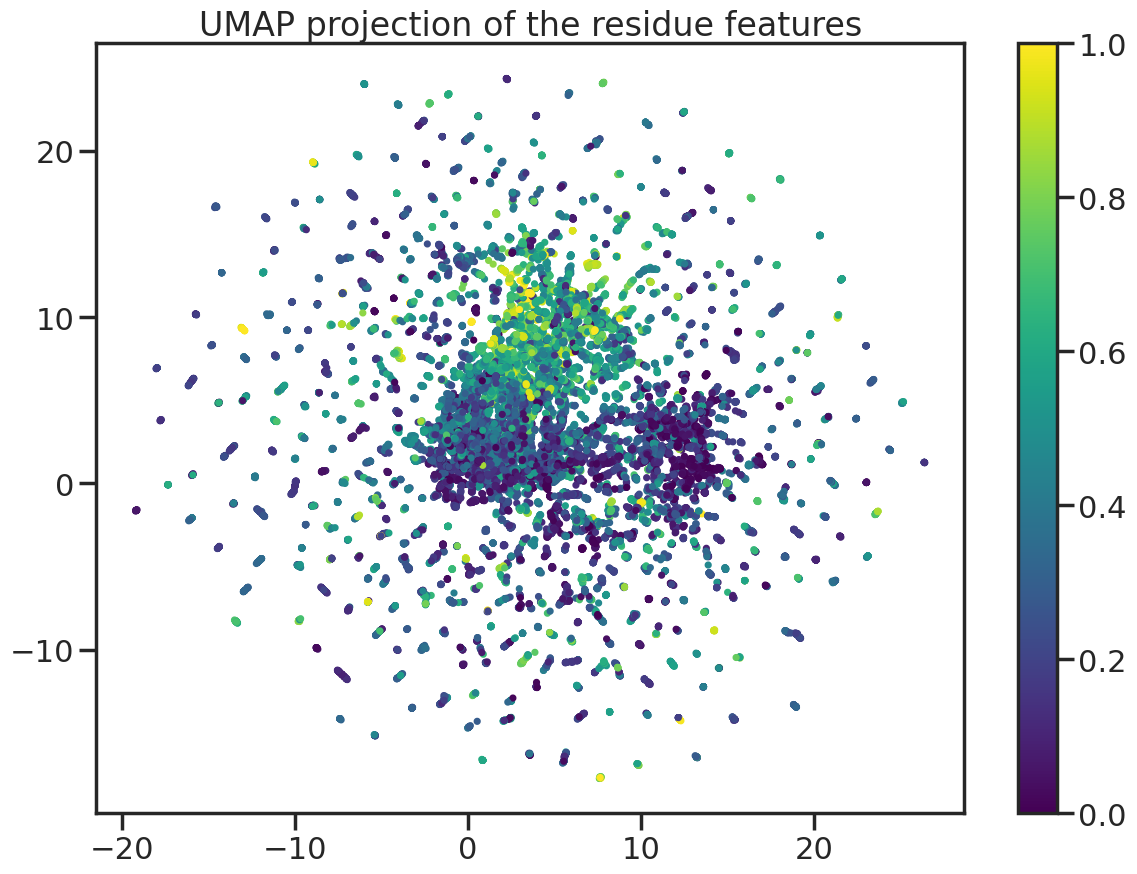

In [61]:
# run UMAP analysis on model embeddings
import umap

def plot_umap(embedding, y_list, n_neighbors=20, min_dist=0.3, metric='cosine'):
    reducer = umap.UMAP(n_neighbors=n_neighbors, min_dist=min_dist, metric=metric)
    umap_embedding = reducer.fit_transform(embed_matrix)
    fig = plt.figure()
    plt.scatter(umap_embedding[:, 0], umap_embedding[:, 1], c=y_list, cmap='viridis', s=10)
    plt.colorbar()
    plt.title('UMAP projection of the residue features')
    plt.show()

plot_umap(scale_embed, y_pred, n_neighbors=20, min_dist=0.3, metric='cosine')

[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 24101 samples in 0.025s...
[t-SNE] Computed neighbors for 24101 samples in 6.003s...
[t-SNE] Computed conditional probabilities for sample 1000 / 24101
[t-SNE] Computed conditional probabilities for sample 2000 / 24101
[t-SNE] Computed conditional probabilities for sample 3000 / 24101
[t-SNE] Computed conditional probabilities for sample 4000 / 24101
[t-SNE] Computed conditional probabilities for sample 5000 / 24101
[t-SNE] Computed conditional probabilities for sample 6000 / 24101
[t-SNE] Computed conditional probabilities for sample 7000 / 24101
[t-SNE] Computed conditional probabilities for sample 8000 / 24101
[t-SNE] Computed conditional probabilities for sample 9000 / 24101
[t-SNE] Computed conditional probabilities for sample 10000 / 24101
[t-SNE] Computed conditional probabilities for sample 11000 / 24101
[t-SNE] Computed conditional probabilities for sample 12000 / 24101
[t-SNE] Computed conditional probabilities for sa

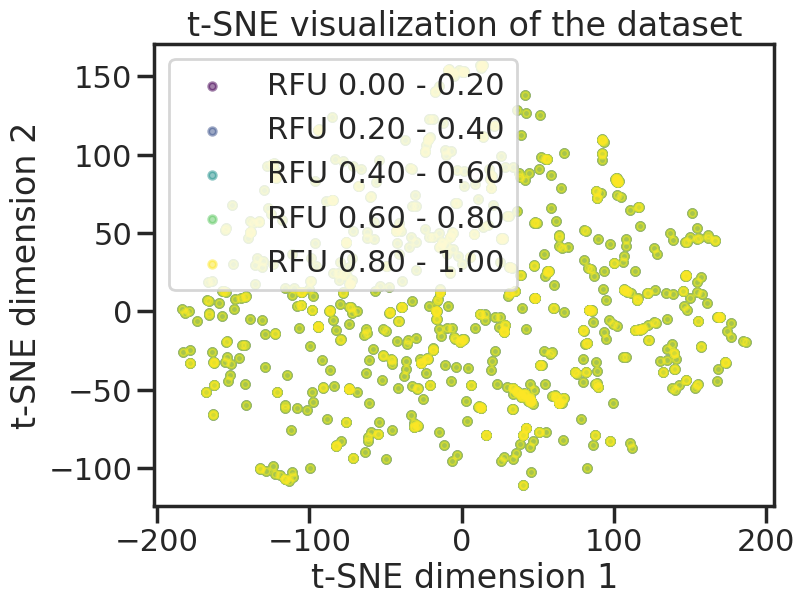

In [59]:
# run t-SNE analysis on model embeddings

from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, perplexity=50.0, n_iter=5000, early_exaggeration=12, learning_rate=368, verbose=1).fit_transform(scale_embed)

num_bins = 5
bins = np.linspace(0, 1, num_bins + 1)
bin_indices = np.digitize(y_true, bins) - 1  # Adjust indices to be 0-based
plt.figure(figsize=(8, 6))
colors = viridis(np.linspace(0, 1, num_bins))  # Use viridis colormap for scientific visualization
marker_size = 30  # Smaller marker size
default_marker = 'o'  # Circle marker for the rest

for i in range(num_bins):
    indices = np.where(bin_indices == i)[0]
    bin_range = f"{bins[i]:.2f} - {bins[i+1]:.2f}"
    plt.scatter(tsne[regular_indices, 0], tsne[regular_indices, 1], color=colors[i],
                label=f"RFU {bin_range}", marker=default_marker, s=marker_size, alpha=0.5)
plt.xlabel("t-SNE dimension 1")
plt.ylabel("t-SNE dimension 2")
plt.title("t-SNE visualization of the dataset")
plt.legend()
plt.rcParams['savefig.dpi'] = 300
plt.show()
#plt.savefig('/home/lwang/models/HDX_LSTM/data/Latest_set/embedding_t-sne.png')